# Lab 05
Hao-Tien Kuo

## Section 1: Multiple Regression

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('cigarette_sales.csv')

1) Answer the following:

a) What is the outcome?

Cigarette sales.

b) What are the predictors they want to understand the impact of?

Age, HS, Income, Black, Female, and Price are all predictors.

c) What is the hypothesis?

H0: None of the factors are related to cigarette sales.

HA: At least one of the factors is related to cigarette sales.

2) Exploratory data analysis

In [2]:
# Look at a few rows of the data to understand it
df1.head(10)

,Age,HS,Income,Black,Female,Price,Sales
0,27.0,41.3,2948,26.2,51.7,42.7,89.8
1,22.9,66.7,4644,3.0,45.7,41.8,121.3
2,26.3,58.1,3665,3.0,50.8,38.5,115.2
3,29.1,39.9,2878,18.3,51.5,38.8,100.3
4,28.1,62.6,4493,7.0,50.8,39.7,123.0
5,26.2,63.9,3855,3.0,50.7,31.1,124.8
6,29.1,56.0,4917,6.0,51.5,45.5,120.0
7,26.8,54.6,4524,14.3,51.3,41.3,155.0
8,28.4,55.2,5079,71.1,53.5,32.6,200.4
9,32.3,52.6,3738,15.3,51.8,43.8,123.6


In [3]:
# Generate some summary statistics
df1.agg(['count', 'mean', 'median', statistics.mode, 'var', 'std', 'sem', 'min', 'max'])

,Age,HS,Income,Black,Female,Price,Sales
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,27.466667,53.149020,3763.705882,9.992157,50.950980,38.074510,121.541176
median,27.400000,53.300000,3751.000000,6.000000,51.100000,38.900000,119.000000
mode,26.800000,55.200000,2948.000000,0.300000,51.000000,38.500000,121.300000
var,3.523067,64.018949,353686.691765,159.979937,1.235349,17.045137,1028.508871
std,1.876983,8.001184,594.715639,12.648318,1.111463,4.128576,32.070374
sem,0.262830,1.120390,83.276847,1.771119,0.155636,0.578116,4.490751
min,22.900000,37.800000,2626.000000,0.200000,45.700000,29.000000,65.500000
max,32.300000,67.300000,5079.000000,71.100000,53.500000,45.500000,265.700000


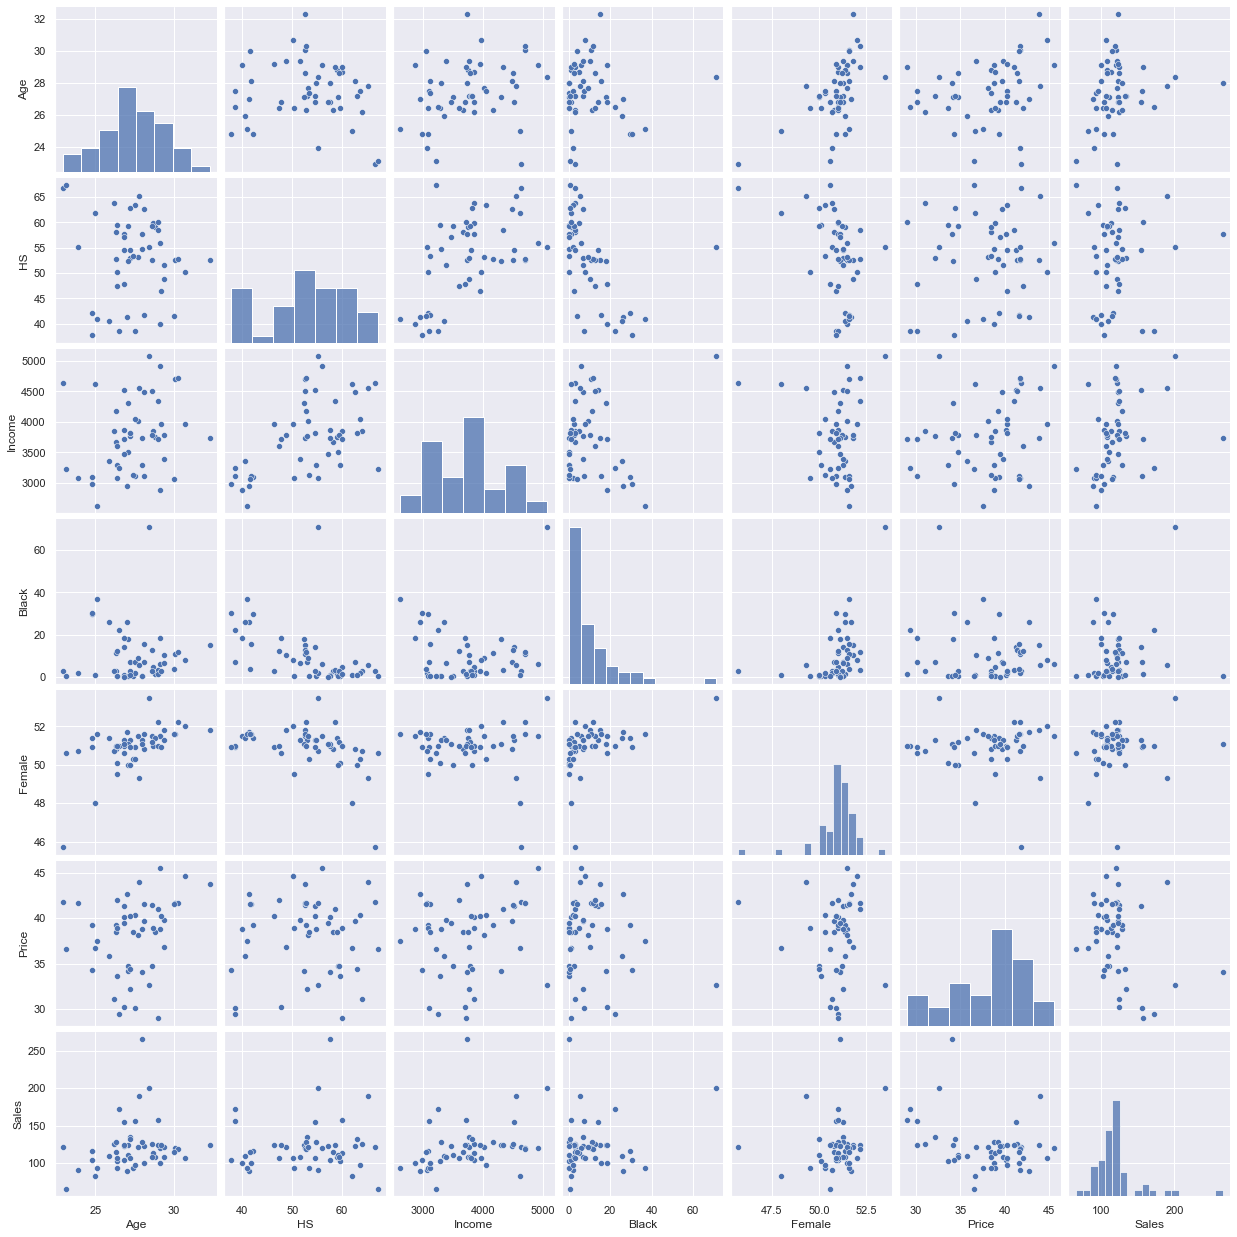

In [4]:
# Look at the distributions and scatterplots of the data.
sns.set(style="darkgrid")
sns.pairplot(df1)
plt.show()

- Do any of these variables look like they might violate regression assumptions? Which ones and which assumptions?

HS and Black do not seem to be normally distributed, which violates the regression assumptions.

- Are there outliers in the outcome?

Yes, we can see from the histogram and scatterplot that there is one state having extremely high sales (>250).

3) Multiple regression

In [5]:
# Conduct a multiple regression analysis
import statsmodels.api as sm

# define response variable
y = df1['Sales']

# define explanatory variable
X = df1[['Age', 'HS', 'Income', 'Black', 'Female', 'Price']]

# add constant to predictor variables
X = sm.add_constant(X)

# fit linear regression model
model = sm.OLS(y, X).fit()

# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.464
Date:                Thu, 29 Sep 2022   Prob (F-statistic):            0.00686
Time:                        23:49:31   Log-Likelihood:                -238.86
No. Observations:                  51   AIC:                             491.7
Df Residuals:                      44   BIC:                             505.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3448    245.607      0.421      0.6

b) Are any of the variables significant? Explain.

Only price is significant, which has a P-value of 0.003 (< 0.05).

c) Interpret the intercept and any significant coefficients (i.e. what is their meaning in relation to
sales?)

The intercept 103.3 is what the sales would be if all the predictors are set to zero. 

The coefficient of price -3.25 means that a unit increase in price would decrease the sales by 3.25 units, and vice versa.

d) Does anything else in the output cause concern?

R-squared is only 0.32 here. The given variables can only explain about 32% of the variantion in sales.

## Section 2: Detecting Assumption Violations

1) Collinearity

In [6]:
# Compute the VIF for each covariate and explain what the results mean.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

# view VIF for each explanatory variable 
vif

# A value between 1 and 5 indicates moderate correlation between a given explanatory variable 
# and other explanatory variables in the model, but this is often not severe enough to require attention.

,VIF,variable
0,3875.756869,const
1,2.300617,Age
2,2.676465,HS
3,2.325164,Income
4,2.392152,Black
5,2.406417,Female
6,1.142181,Price


In [7]:
# Compute all the pairwise correlations between the variables.
df1.corr()

,Age,HS,Income,Black,Female,Price,Sales
Age,1.000000,-0.098916,0.256581,-0.040330,0.553032,0.247757,0.226555
HS,-0.098916,1.000000,0.534005,-0.501712,-0.417378,0.056975,0.066695
Income,0.256581,0.534005,1.000000,0.017288,-0.068827,0.214557,0.326068
Black,-0.040330,-0.501712,0.017288,1.000000,0.450900,-0.147776,0.189590
Female,0.553032,-0.417378,-0.068827,0.450900,1.000000,0.022474,0.146221
Price,0.247757,0.056975,0.214557,-0.147776,0.022474,1.000000,-0.300623
Sales,0.226555,0.066695,0.326068,0.189590,0.146221,-0.300623,1.000000


In [8]:
# Remove the 3 variables with the highest p-values. Refit the model. 
X2 = df1[['Age', 'Income', 'Price']]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y, X2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     6.818
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           0.000657
Time:                        23:55:00   Log-Likelihood:                -239.51
No. Observations:                  51   AIC:                             487.0
Df Residuals:                      47   BIC:                             494.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2482     61.933      1.037      0.3

- How have the p-values for the other variables changed? Did R2 change by much?

The p-values all go down for constant, Age, Income, and Price. R squared is slightly lower (0.303), but given that we dropped three predictors, this is a fairly good result.

2) Model Fit

a) Find the goodness of fit measure in the output and explain what it means

R squared is 0.303, which means about 30% of the variantion in the outcome can be explained by the predictors.

b) As noted in the video on MLE, AIC is another measure of fit. Which model has the lowest AIC value (lowest is best)?

The second one.

3) Outliers

In [66]:
# Set plot style
plt.style.use('seaborn') 
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Calculations required for some of the plots:

# fitted values (need a constant term for intercept)
model_fitted_y = model2.fittedvalues

# normalized residuals
model_norm_residuals = model2.get_influence().resid_studentized_internal

# leverage, from statsmodels internals
model_leverage = model2.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model2.get_influence().cooks_distance[0]

/Users/guohaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


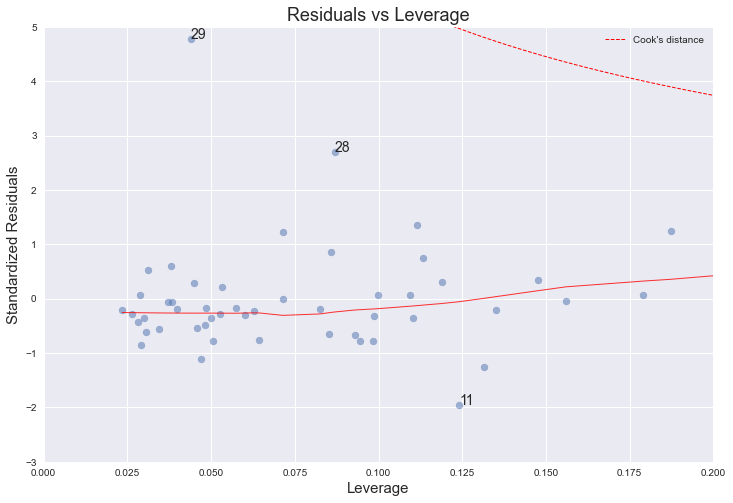

In [67]:
# Do a leverage plot to see if the outliers are influential.

plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right')

4) Linearity & constant variance

/Users/guohaotian/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


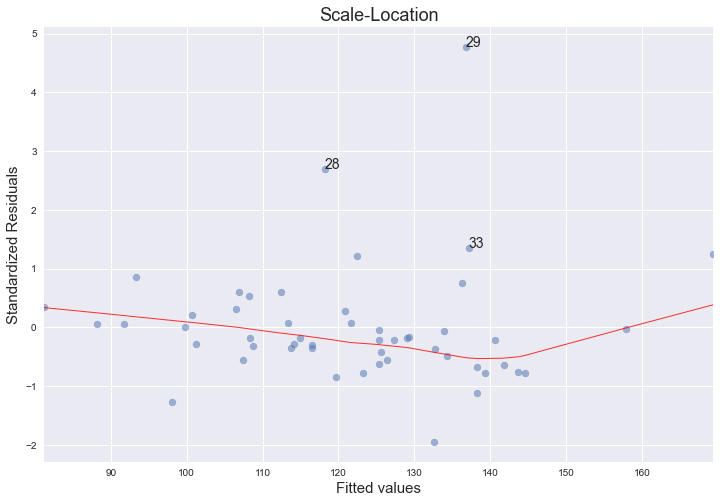

In [68]:
# Generate a predicted vs standardized residual plot

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('Standardized Residuals');

# annotations
norm_resid = np.flip(np.argsort(model_norm_residuals), 0)
norm_resid_top_3 = norm_resid[:3]

for i in norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals[i]))

5) Normality

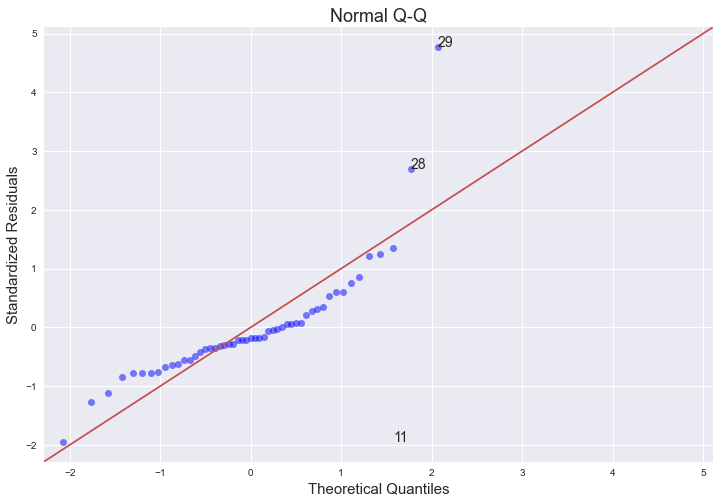

In [69]:
# Do a Q-Q Plot to see if the residuals are normally distributed
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))